In [ ]:
!pip install timm==0.9.12

  Using cached timm-0.9.12-py3-none-any.whl (2.2 MB)
  Using cached huggingface_hub-0.19.4-py3-none-any.whl (311 kB)


In [ ]:
import torch
from PIL import Image
import numpy as np
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
#https://github.com/ChaoningZhang/MobileSAM

model_type = "vit_t"
sam_checkpoint = "/work/mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()


image = Image.open("/work/how-to-care-for-your-soccer-ball.jpeg")
image_array = np.array(image)
mask_generator = SamAutomaticMaskGenerator(mobile_sam)
masks = mask_generator.generate(image_array)

/usr/local/lib/python3.10/dist-packages/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/usr/local/lib/python3.10/dist-packages/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_21m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_

In [ ]:
print(masks)

[{'segmentation': array([[False, False, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 262846, 'bbox': [0, 0, 834, 365], 'predicted_iou': 1.0437568426132202, 'point_coords': [[430.546875, 182.765625]], 'stability_score': 0.9802082777023315, 'crop_box': [0, 0, 835, 557]}, {'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 140938, 'bbox': [0, 374, 834, 181], 'predicted_iou': 1.038783550

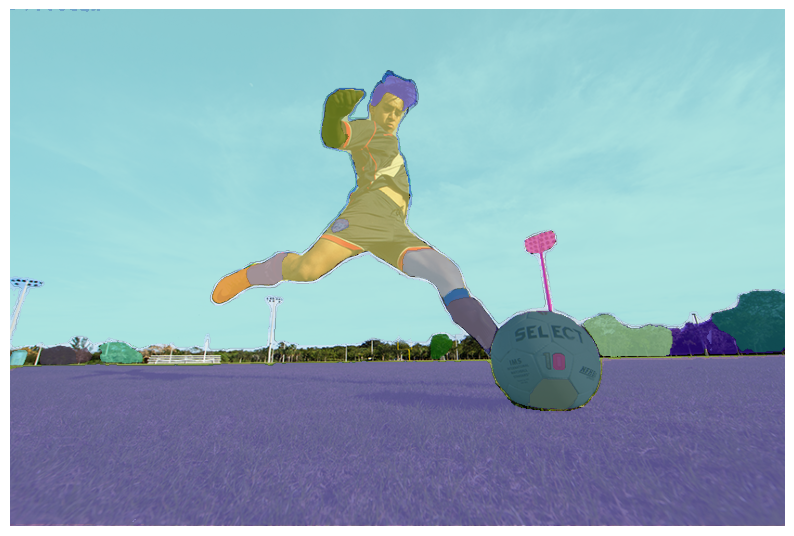

In [ ]:
from matplotlib import pyplot as plt
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

plt.figure(figsize=(10, 10))
plt.imshow(image)
for mask in masks:
    show_mask(mask["segmentation"], plt.gca(), random_color=True)
plt.axis('off')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=443541ce-e170-4459-8340-438ed0837988' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>